In [1]:
#Import necessary data for data analysis
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sys
print(sys.version)

3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [2]:
#LoadData
df=pd.read_csv('/kaggle/input/sample-sale-data/sales_data_sample.csv', encoding='ISO-8859-1')
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
#Basic understanding process
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


Observations:

1. There are few columns as null value, like : ADDRESSLINE2,STATE,POSTALCODE and TERRITORY ,which deserves a further exploartion and decision of null values.
2. Through descibe function we may find the highest unit price is 100 dollars,the highest MSRP(manufacturer suggested selling Price) is 214 dollars, maximum year is 2005 and minimum year is 2003 , which indicates the data contain the information from 2003 to 2005 ,overall it looks logically to me as no numbers are negative and no month_id exceeds 12 or no QTR_ID exceeds 4.
3. As all of the column name are uppercase, I would like to change lowecase for easy typing.
4. Change ODERDATE from object type to Datetime type for EDA.

# Data Cleaning
**Change Cloumn name**



In [4]:
#Create lowe case list
column_name_lower=[]
for i in df.columns:
    column_name_lower.append(i.lower())
column_name_lower

['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']

In [5]:
#Rename by replacing with lower case list
for i in range(0,len(df.columns),1):
    df=df.rename(columns={df.columns[i] : str(column_name_lower[i])})
df.head(5)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Explore Null Values and Duplicate**

In [6]:
df.duplicated().sum()
print('There  are ' ,df.duplicated().sum(),'row duplicate')

There  are  0 row duplicate


In [7]:
isnull=pd.DataFrame(df.isnull().sum())
isnull.style.background_gradient(cmap='Blues')

,0
ordernumber,0
quantityordered,0
priceeach,0
orderlinenumber,0
sales,0
orderdate,0
status,0
qtr_id,0
month_id,0
year_id,0


In [8]:
#Check null value proportions
null_value_columns=['addressline2','state','postalcode','territory']

for col in null_value_columns:
    percentage=round((df[col].isnull().sum()/len(df)*100),2)
    print(f'{col} missing: {percentage}%')

addressline2 missing: 89.3%
state missing: 52.64%
postalcode missing: 2.69%
territory missing: 38.04%


In [9]:
#Investigate the relationship of Country and State
df.groupby(by=['country']).value_counts(['state'])

country    state        
Australia  NSW               92
           Victoria          78
           Queensland        15
Canada     BC                48
           Quebec            22
Japan      Tokyo             32
           Osaka             20
UK         Isle of Wight     26
USA        CA               416
           MA               190
           NY               178
           PA                75
           CT                61
           NH                34
           NV                29
           NJ                21
Name: count, dtype: int64

In [10]:
#Investigate which country has most null values
df[df['state'].isnull()]['country'].value_counts()

country
Spain          342
France         314
UK             118
Italy          113
Finland         92
Norway          85
Singapore       79
Denmark         63
Germany         62
Sweden          57
Austria         55
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: count, dtype: int64

In [11]:
#Investigate the territory null value 
print('Below country has no territory label')
df[df['territory'].isnull()]['country'].value_counts()

Below country has no territory label


country
USA       1004
Canada      70
Name: count, dtype: int64

In [12]:
#Look into current Territory Label
df['territory'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

# Observation
1. There is no duplicates in the data.
2. For column contain null values, focus on territory and state
    *     Territory
        *  Only '[nan, 'EMEA', 'APAC', 'Japan']' are unique in territory labels   
    *     State  
        * 5 countries contain State information
        * Spain has the most null vlaues of state.  
3. In a nutshell, when analyze geographically we can look into 'country' and 'city'   rather than territory and state 
4. Future work:
    *     Asking stakeholders(sales/operation team) to update the territory label
    *     Save the null data, and ask stakeholders to update the state-missing label

In [13]:
#Change orderdate to datetime object
df['orderdate']=pd.to_datetime(df['orderdate'])
df['orderdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2823 entries, 0 to 2822
Series name: orderdate
Non-Null Count  Dtype         
--------------  -----         
2823 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.2 KB


In [14]:
df['monthvar']=df['orderdate'].dt.strftime('%b')
df['weekday']=df['orderdate'].dt.strftime('%a')
df['weeknumber']=df['orderdate'].apply(lambda x: x.isoweekday() )
df.head(5)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,monthvar,weekday,weeknumber
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NY,10022,USA,NaN,Yu,Kwai,Small,Feb,Mon,1
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,51100,France,EMEA,Henriot,Paul,Small,May,Wed,3
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,Jul,Tue,2
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,CA,90003,USA,NaN,Young,Julie,Medium,Aug,Mon,1
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,CA,NaN,USA,NaN,Brown,Julie,Medium,Oct,Fri,5


# EDA - Sales Distribution in Time and Country Segment
# Yearly Revenue

In [15]:
#Revenue by year

yearly_sale=df.groupby(['year_id'])[['sales']].sum(numeric_only=True).reset_index()
yearly_sale

,year_id,sales
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


In [16]:
df.groupby(['year_id'])['sales'].sum()

year_id
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: sales, dtype: float64

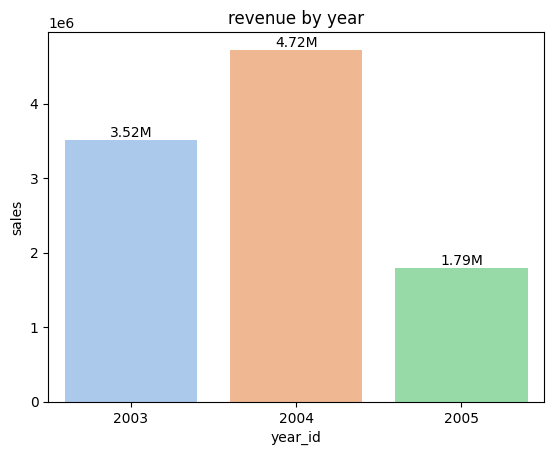

In [17]:
#Plot the revenue by year
plt.title('revenue by year')
ax=sns.barplot(yearly_sale, x='year_id' , y='sales' , palette='pastel')
labels=[f'{values/1e6:.2f}M' for values in yearly_sale['sales']]
for bars in ax.containers:
    ax.bar_label(bars, labels=labels , fontsize=10)


In [18]:
df.groupby('year_id')['month_id'].apply(lambda x: sorted(x.unique())).reset_index()

,year_id,month_id
0,2003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,2004,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2,2005,"[1, 2, 3, 4, 5]"


# Overall country sales in each year

In [19]:
yearly_sales_by_country=df.groupby(['country','year_id'])[['sales']].sum().reset_index()
yearly_sales_by_country

,country,year_id,sales
0,Australia,2003,253134.45
1,Australia,2004,232396.68
2,Australia,2005,145091.97
3,Austria,2003,82117.88
4,Austria,2004,51694.39
5,Austria,2005,68250.26
6,Belgium,2003,3348.46
7,Belgium,2004,80024.05
8,Belgium,2005,25040.11
9,Canada,2003,54609.50


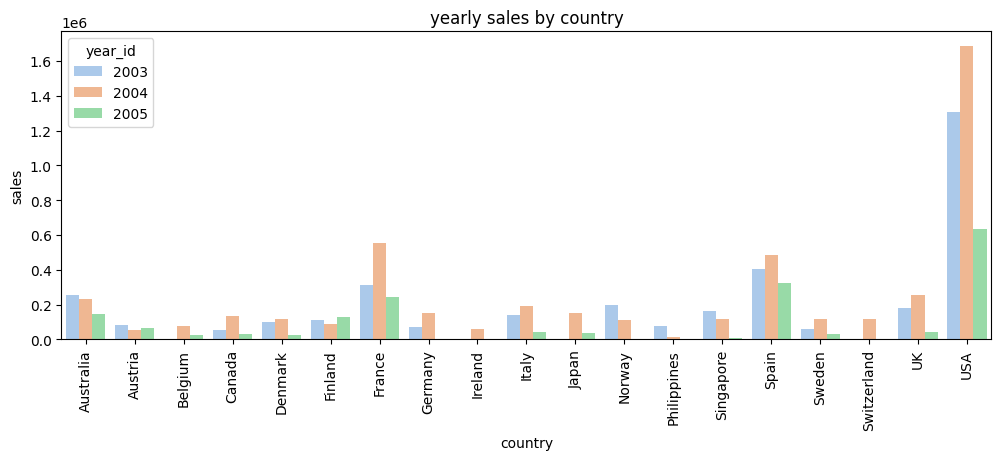

In [20]:
plt.figure(figsize=(12,4))
plt.title('yearly sales by country')
ax=sns.barplot(yearly_sales_by_country , x='country' , y='sales' , hue='year_id', palette='pastel')
xlabels=list(yearly_sales_by_country['country'].unique())
ax.set_xticklabels(labels=xlabels , rotation=90)
slabels=[f'{values/1e6:.2}M' for values in yearly_sales_by_country['sales'] ]
plt.show()

# Observation 
* Through the graph , 2004 has the highest revenue amoung  3 years( however , 2005 has only 5 months data. So, we will talk about it later ).
* USA is the top contributor ,France and Spain seems very close , they shall be 2nd and 3rd place . We can look closer later.

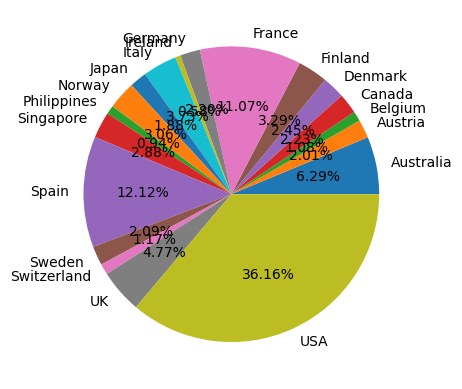

In [21]:
#Country Proportion
df1=df.groupby('country')['sales'].sum().reset_index()
total_sales=df1['sales'].sum()

labels=[]
for x in range(0,len(df1)):
    labels.append(df1['country'][x])


plt.pie(data=df1 , x=df1['sales'] ,autopct= '%1.2f%%', labels=labels)
plt.show()

# Observation
* USA takes up 36.16 % of revenue.
* Spain and France are very close , respectively 12.12% and 11.07 % .
* We can easily see from pie chart , USA , Spain , France are top three markets. They contribute up to 60% of revenue.
* I'd like to arrange a table for better understanding of each market growth by year.

In [22]:
#Top 10 Sales Country by each year
_2003sales_by_country_ds=df[df['year_id']==2003].groupby(['year_id','country'])[['sales']].sum().sort_values('sales',ascending=False).reset_index().head(10)
_2003sales_by_country_ds.head(10)

_2004sales_by_country_ds=df[df['year_id']==2004].groupby(['year_id','country'])[['sales']].sum().sort_values('sales',ascending=False).reset_index().head(10)
_2004sales_by_country_ds.head(10)

_2005sales_by_country_ds=df[df['year_id']==2005].groupby(['year_id','country'])[['sales']].sum().sort_values('sales',ascending=False).reset_index().head(10)
_2005sales_by_country_ds.head(10)

,year_id,country,sales
0,2005,USA,637364.26
1,2005,Spain,326798.17
2,2005,France,242956.40
3,2005,Australia,145091.97
4,2005,Finland,126851.71
5,2005,Austria,68250.26
6,2005,Italy,41509.94
7,2005,UK,40802.81
8,2005,Japan,38745.34
9,2005,Canada,33692.97


In [23]:
#Took the table aggregate earlier to calculate Revenue percenatge
yearly_sales=df.groupby(['year_id'])[['sales']].sum(numeric_only=True).reset_index()
yearly_sales

,year_id,sales
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


In [24]:
_2003sales_by_country_ds['percent1']=round(_2003sales_by_country_ds['sales']/yearly_sales['sales'][0]*100,2)
_2004sales_by_country_ds['percent2']=round(_2004sales_by_country_ds['sales']/yearly_sales['sales'][1]*100,2)
_2005sales_by_country_ds['percent3']=round(_2005sales_by_country_ds['sales']/yearly_sales['sales'][2]*100,2)

Top10_2003_2005=pd.concat([_2003sales_by_country_ds,_2004sales_by_country_ds,_2005sales_by_country_ds],axis=1)
Top10_2003_2005

,year_id,country,sales,percent1,year_id,country,sales,percent2,year_id,country,sales,percent3
0,2003,USA,1305147.88,37.11,2004,USA,1685470.69,35.68,2005,USA,637364.26,35.58
1,2003,Spain,405343.39,11.53,2004,France,555198.70,11.75,2005,Spain,326798.17,18.24
2,2003,France,312761.42,8.89,2004,Spain,483545.36,10.24,2005,France,242956.40,13.56
3,2003,Australia,253134.45,7.20,2004,UK,257656.10,5.45,2005,Australia,145091.97,8.10
4,2003,Norway,196532.60,5.59,2004,Australia,232396.68,4.92,2005,Finland,126851.71,7.08
5,2003,UK,180421.55,5.13,2004,Italy,192235.60,4.07,2005,Austria,68250.26,3.81
6,2003,Singapore,165686.20,4.71,2004,Germany,150418.78,3.18,2005,Italy,41509.94,2.32
7,2003,Italy,140928.77,4.01,2004,Japan,149422.47,3.16,2005,UK,40802.81,2.28
8,2003,Finland,111154.51,3.16,2004,Canada,135776.09,2.87,2005,Japan,38745.34,2.16
9,2003,Denmark,99192.72,2.82,2004,Denmark,120431.56,2.55,2005,Canada,33692.97,1.88


In [25]:
#See how much does top 10 countries contribute to total revenue

print('2003 top 10 countries take up to ', round(Top10_2003_2005['percent1'].sum(),2),'% of revenue')
print('2004 top 10 countries take up to ',round(Top10_2003_2005['percent2'].sum(),2),'% of revenue')
print('2005 top 10 countries take up to ', round(Top10_2003_2005['percent3'].sum(),2),'% of revenue')

2003 top 10 countries take up to  90.15 % of revenue
2004 top 10 countries take up to  83.87 % of revenue
2005 top 10 countries take up to  95.01 % of revenue


# Observation
* From comparison tabel , USA is an important market for the company.
* Japan and Norway are interesting , Nowway include in top 10 countries in 2003.But not top 10 in next 2 years. But Japan quickly came up to top 10 countries after 2004.It might be related to the company market decision.
* Australia has been included in top 10 countries for three years straight.
* Top 10 countries contribute over 80% of the total revenue. It meets the 8020 principle.


# Monthly and weekly revenue trend

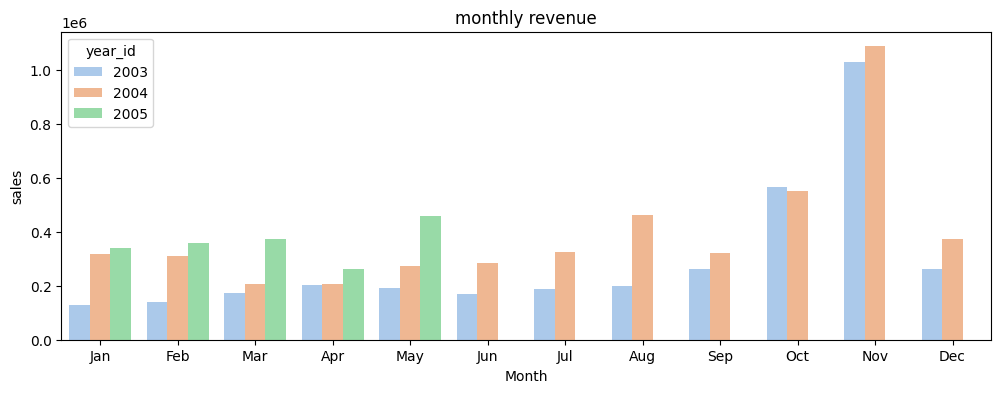

In [26]:
#Revenue by month

order=['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_revenue=df.groupby(['year_id','month_id'])[['sales']].sum().reset_index()
plt.figure(figsize=(12,4))
ax=sns.barplot(data=monthly_revenue , x='month_id' , y='sales',hue='year_id' , palette='pastel')
plt.title('monthly revenue')
ax.set_xlabel('Month')
ax.set_xticklabels(order)
plt.show()


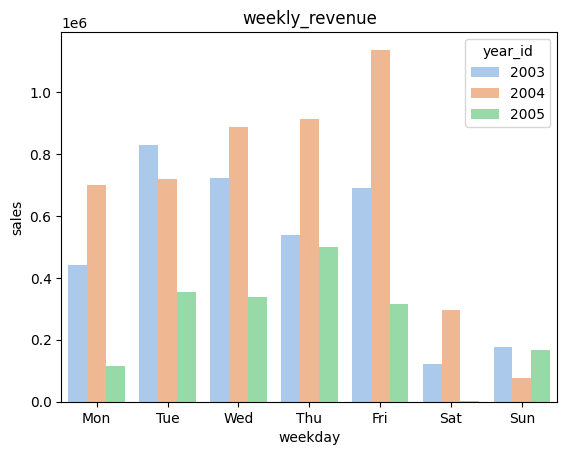

In [27]:
weekly_revenue=df.groupby(['weekday','year_id','weeknumber'])[['sales']].sum().reset_index().sort_values(by='weeknumber')
ax=sns.barplot(data=weekly_revenue ,x='weekday' , y='sales' , hue='year_id' , palette='pastel')
plt.title('weekly_revenue')
ax.set_xlabel('weekday')
plt.show()


# Obeservation
* There are only 5 months in 2005 , so it is not intact , we should condider while looking at yearly revenue.
* from monthly perspective , the second half of the year(Jul-Dec) has a speedly growth in sales than the first half it might be purchasing season for this industry.
* from a weekly perspective , sunday has the lowest buy rate throughout a week.Friday has the hightest buy rate.

# EDA - Analysis of Product line and Shipping Status

In [28]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize', 'monthvar', 'weekday', 'weeknumber'],
      dtype='object')

In [29]:
#Make a plotter function
def barplotter(data , colname1 ,colname2 , title, **kwargs):
    plt.title(title)
    sns.barplot(data=data ,x=data[colname1] , y=data[colname2] , palette='Paired' ,**kwargs)
    plt.xticks(rotation=60)
    

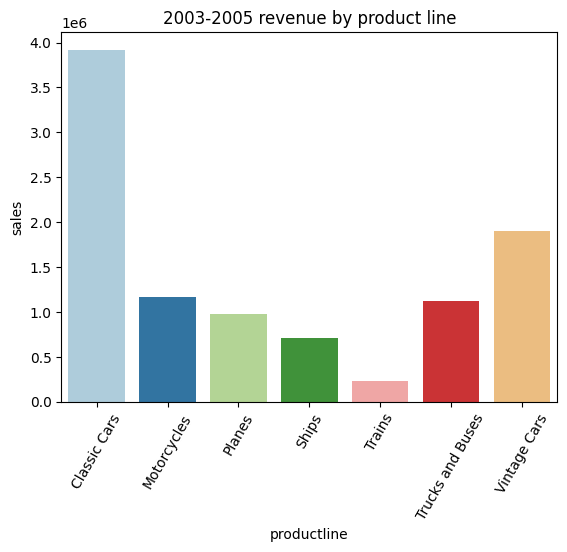

In [30]:
sales_by_productline=df.groupby(['productline'])[['sales']].sum().reset_index()
barplotter(data=sales_by_productline , colname1='productline' , colname2='sales' , title='2003-2005 revenue by product line')

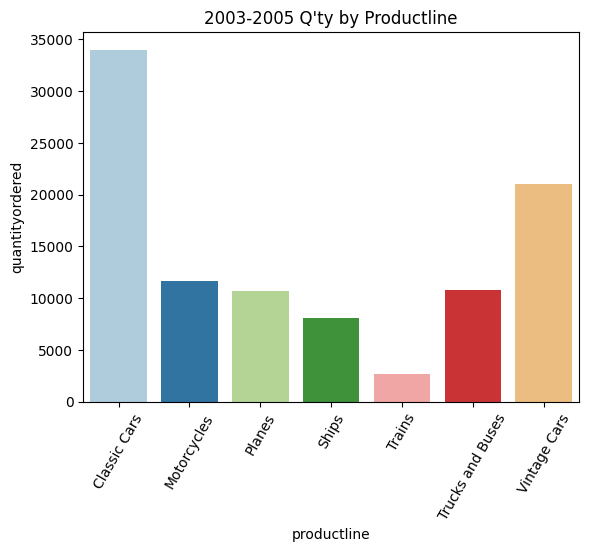

In [31]:
sales_by_productline=df.groupby(['productline'])[['quantityordered']].sum().reset_index()
barplotter(data=sales_by_productline , colname1='productline' ,colname2='quantityordered' , title="2003-2005 Q'ty by Productline")

#  Observation
* Revenue and Quantity by product have similar trend ,Classic Cars is the most popular and Vintage Cars is the second.
* I would like to look at unit price and quantity distribution . sometimes higher price is lower quantity.

Text(0, 0.5, 'QTY')

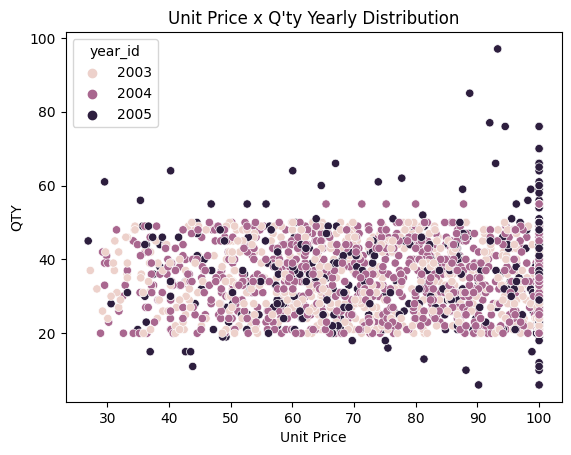

In [32]:
sns.scatterplot(data=df ,x='priceeach' , y='quantityordered' , hue='year_id')
plt.title("Unit Price x Q'ty Yearly Distribution")
plt.xlabel('Unit Price')
plt.ylabel('QTY')

In [33]:
print('Minimum unit price:' , df['priceeach'].min())
print('Maximum unit price:' , df['priceeach'].max())
print('Minimum msrp:' , df['msrp'].min())
print('Maximun msrp:' , df['msrp'].max())

Minimum unit price: 26.88
Maximum unit price: 100.0
Minimum msrp: 33
Maximun msrp: 214


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: title={'center': 'Unit Price among different Product'}, xlabel='Price', ylabel='QTY'>

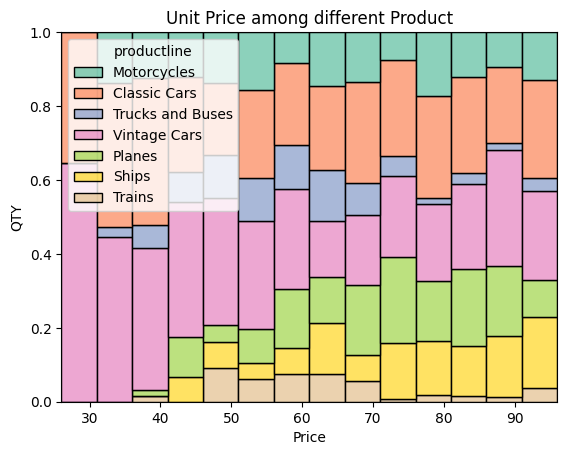

In [34]:
plt.title('Unit Price among different Product')
plt.xlabel('Price')
plt.ylabel('QTY')
sns.histplot(data=df ,x='priceeach' ,hue='productline',multiple='fill',palette='Set2',bins=range(26, 101, 5) )

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'MSRP')

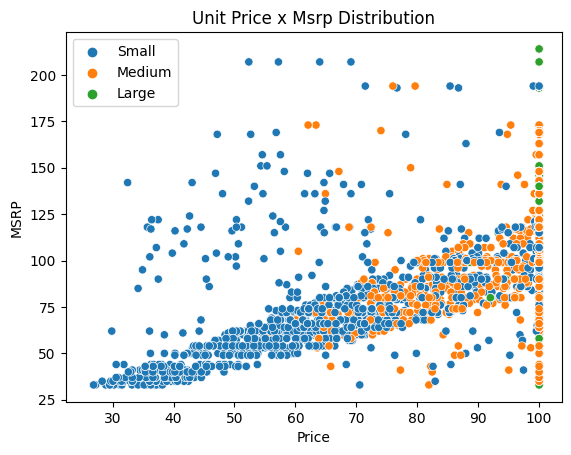

In [35]:
sns.scatterplot(data=df ,x='priceeach' ,y='msrp' , hue='dealsize')
sns.lineplot(x=(26, 26), y=(100, 100), linestyle='--', color='r')
plt.title('Unit Price x Msrp Distribution')
plt.xlabel('Price')
plt.ylabel('MSRP')

# Observation
* The manimum unit price is 26.88 and maximum unit price is 100.
* It is interesting to see from "Unit Price x QTY Distribtion that is 2003 and 2004 order qty are pretty stable around 20-50.
* While 2005  order qty are jump out of 20-50 pcs, a little bit less and more , which we can not see in less 2 years.
* From plot"Unit Price Among Different Products", Vintage car usually sells at lower price ($30-$50), plane and ships usually sells at higher price($60-$90), and Train $45-70
* Motorcycle and classic cars have relative same proportion at each price range


# Deal Size By Country

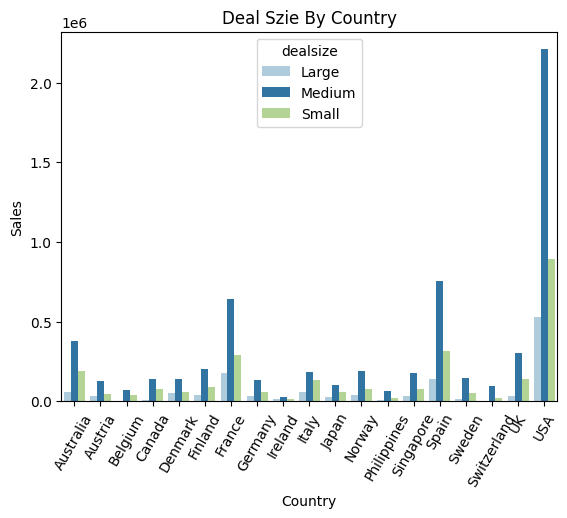

<Figure size 2000x500 with 0 Axes>

In [36]:
countrysales_by_productline=df.groupby(['country','dealsize'])[['sales']].sum().reset_index()

barplotter(data=countrysales_by_productline, colname1='country' ,colname2='sales' , hue=countrysales_by_productline['dealsize'] ,title='Deal Szie By Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.figure(figsize=(20,5))
plt.show()

# Obeservation
1. Most Countries have medimum deal size.
2. Small deal size is more than large deal size.

# Order Status Analysis

In [37]:
df['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [38]:
df_other_status=df[df['status']!='Shipped']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='status', ylabel='Count'>

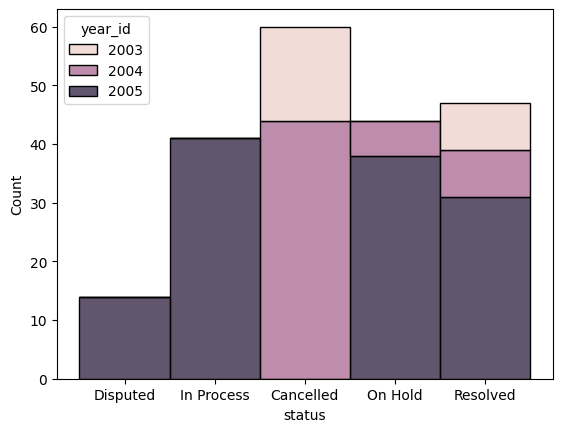

In [39]:
sns.histplot(data=df_other_status , x='status' ,hue='year_id' , multiple='stack')

# Obeservation
1. Lastly , I look at the order status, it can help to check if any order are left behind.
2. Overall it looks good , mostly the order that need to be handle (ie. Inprocess , disputed , etc) are in this year. (assuming data collecting year is 2005.
3. One order from 2004 is on hold , we can ask the stakeholder to after it.

# Conclusion
1. 2005 Sales data only have 5 months, it need to be considered while checking yearly revenue.
2. Top 10 countries supply over 80-95% revenue.
3. The Most popular product line is classic cars and the bigest market is USA.
4. In 2003&2004 most order q'ty are around 20-50pcs, in 2005 we can see some orders q'ty are more than that section.
5. Deal Size distribution : Medium >Small>Large.
6. Vintage car usually sells at lower price  (30-50), Train (45-70),Plane and ships usually sells at higher price(60-90); Motorcycle and classic cars have relative same proportion at each price range.
7. Second-half year (Jul-Dec) has a speedy growth in sales then the first half, it might be a purchasing season for this industry.
8. From a weekly perspective , sunday has the lowest buy rate throughout a week.Friday has the hightest buy rate.
9. There are few msrp(manufuctured suggest resell price) lower than unit, it stands for distributor is doing a money lossing business, it deserves further investigation.
10. There are some data missing and their missing rate below:
    *addressline2 missing: 89.33%/ state missing: 52.66%/ postalcode missing: 2.69%/ territory missing: 38.06%     